<a href="https://colab.research.google.com/github/Serzh-byte/travel_agency_project/blob/main/travel_agency_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## importing the libraries

In [ ]:
bookings = pd.read_csv('Bookings.csv') #reading the Bookings.csv file
sessions = pd.read_csv('Sessions.csv') #reading the Sessions.csv file

In [ ]:
# 1. Find the number of distinct bookings, sessions, and searches from the given
# datasets.

distinct_bookings = bookings['booking_id'].nunique()
print(f"Number of distinct bookings: {distinct_bookings}")

distinct_sessions = sessions['session_id'].nunique()
print(f"Number of distinct sessions: {distinct_sessions}")


Number of distinct bookings: 339
Number of distinct sessions: 331


In [ ]:
# 2. How many sessions have more than one booking?

# Calculate the total count of the sessions
total_count = sessions['session_id'].count()

# Calculate the amount of unique sessions
unique_sessions = sessions['session_id'].nunique()

# Substract to find sessions that have more than one booking
sessions_with_more_than_one_booking = total_count - unique_sessions
print(f"Number of sessions with more than one booking: {sessions_with_more_than_one_booking}")

Number of sessions with more than one booking: 1166


booking_time
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


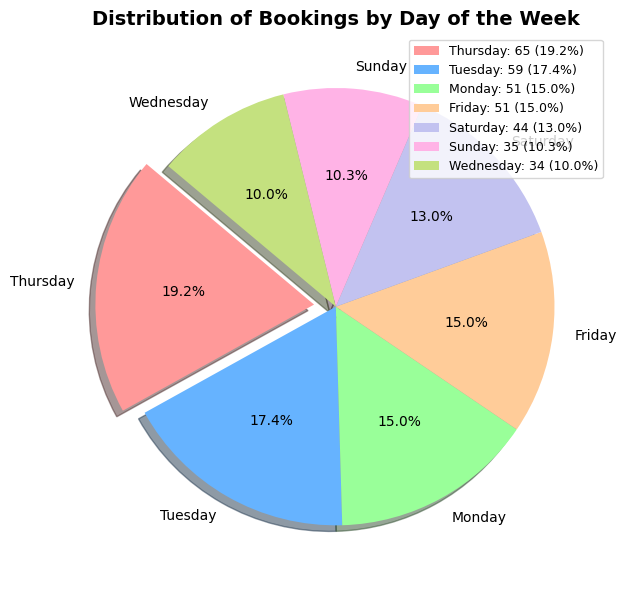

In [ ]:
# 3. Which days of the week have the highest number of bookings? Also, draw a
# pie chart to show the distribution for all days of the week?

# Extracting days of the week
days = pd.to_datetime(bookings['booking_time'])
days_of_week = days.dt.day_name()
bookings_per_day = days_of_week.value_counts()

# Sorting the values for a clean output
print(bookings_per_day.sort_values(ascending=False))

# Pie chart data
labels = bookings_per_day.index
sizes = bookings_per_day.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f']
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]  # Highlight the largest slice

# Plot
plt.figure(figsize=(8, 6))  # Set figure size
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    textprops={'fontsize': 10}  # Adjust label font size
)
plt.title('Distribution of Bookings by Day of the Week', fontsize=14, weight='bold')  # Descriptive title
plt.legend(
    labels=[f'{label}: {value} ({value/sum(sizes)*100:.1f}%)' for label, value in zip(labels, sizes)],
    loc='upper right',
    fontsize=9
)
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


In [ ]:
# 4. For each of the service names, display the total number of bookings and the
# total Gross Booking Value (in INR).

# Calculate the number of bookings per service by counting occurrences of each 'service_name'
bookings_per_service = bookings['service_name'].value_counts()

# Display the total number of bookings per service
print(f'Bookings per service: \n{bookings_per_service}')

# Group the bookings by 'service_name' and calculate the sum of 'INR_Amount' for each service
gross_inr = bookings.groupby('service_name')['INR_Amount'].sum()

# Rename the resulting Series to 'gross_ISR_amount' for clarity
gross_inr = gross_inr.rename("gross_ISR_amount")

# Display the total gross booking value (in INR) per service
print(gross_inr)


Bookings per service: 
service_name
GOIBIBO    186
YATRA      105
MMT         48
Name: count, dtype: int64
service_name
GOIBIBO    5897637.97
MMT         665669.08
YATRA      3378702.13
Name: gross_ISR_amount, dtype: float64


In [ ]:
# For customers who have more than 1 booking, which is the most booked route
# (from_city to to_city)?

# Filter customers with more than one booking.
# The condition uses 'value_counts' to count how many times each 'customer_id' appears,
# and selects those with more than one booking.
customers_more_than_one_booking = bookings[
    bookings['customer_id'].map(bookings['customer_id'].value_counts()) > 1
]

# Group the filtered data by the combination of 'from_city' and 'to_city',
# and count the occurrences (number of bookings) for each route.
from_city_to_city = (
    customers_more_than_one_booking
    .groupby(['from_city', 'to_city'])  # Group by 'from_city' and 'to_city'
    .size()  # Count the number of bookings for each group
    .reset_index(name='booking_count')  # Rename the count to 'booking_count'
)

# Sort the routes by 'booking_count' in descending order and pick the top route.
most_booked_route = from_city_to_city.sort_values(by='booking_count', ascending=False).head(1)

# Display the most booked route
print(most_booked_route)

   from_city           to_city  booking_count
26   Gurgaon  Roissy-en-France              5


In [ ]:
##### 6. Which are the top 3 departure cities from where customers book mostly in advance,
# provided that there have been at least 5 departures from that city?

# Step 1: Group the bookings by 'from_city' and count the number of departures from each city.
city_departures = bookings.groupby('from_city').size().reset_index(name='departure_count')

# Step 2: Filter the cities to only include those with at least 5 departures.
eligible_cities = city_departures[city_departures['departure_count'] >= 5]

# Sort the eligible cities by 'departure_count' in descending order for easier inspection.
eligible_cities = eligible_cities.sort_values(by='departure_count', ascending=False).reset_index(drop=True)

# Step 3: Filter the original bookings data to include only the rows for eligible cities.
filtered_bookings = bookings[bookings['from_city'].isin(eligible_cities['from_city'])]

# Step 4: Calculate the average number of days to departure ('days_to_departure') for each eligible city.
avg_advance_booking = (
    filtered_bookings.groupby('from_city')['days_to_departure']  # Group by 'from_city'
    .mean()  # Calculate the mean of 'days_to_departure' for each city
    .reset_index(name='avg_days_to_departure')  # Rename the result column to 'avg_days_to_departure'
)

# Step 5: Sort the cities by 'avg_days_to_departure' in descending order and select the top 3 cities.
top_departure_cities = avg_advance_booking.sort_values(by='avg_days_to_departure', ascending=False).head(3)

# Step 6: Display the top 3 cities where customers book mostly in advance.
print(top_departure_cities)


    from_city  avg_days_to_departure
1     Bālāpur              46.166667
4  Devanhalli              29.583333
2     Chennai              26.187500


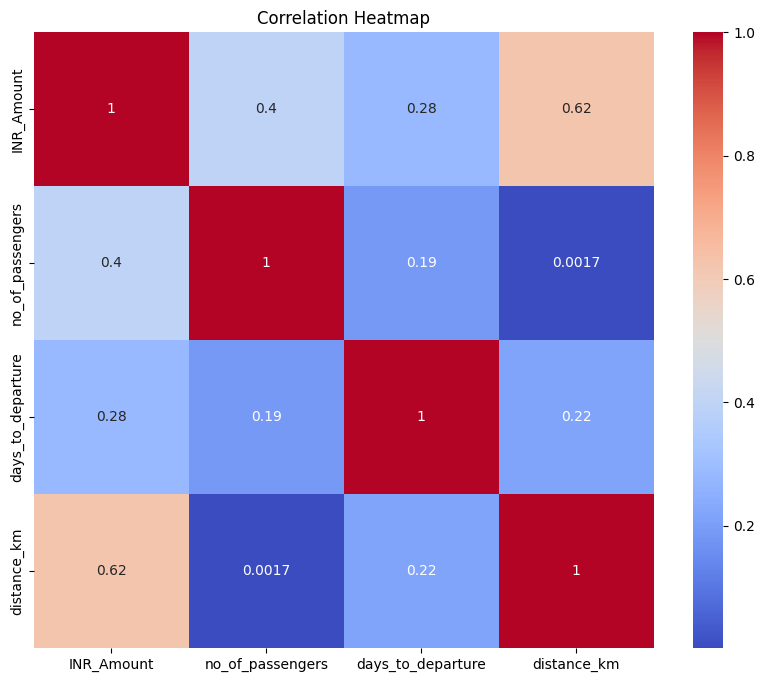

The pair of numerical columns with the maximum correlation: ('INR_Amount', 'distance_km')


In [ ]:
# 7. Plot a heatmap displaying correlations of the numerical columns and report
# which pair of numerical columns in the bookings data set have the maximum correlation?

# Step 1: Select only the numerical columns from the 'bookings' dataset using select_dtypes.
columns = bookings.select_dtypes(include=['number']).columns

# Step 2: Calculate the correlation matrix of the numerical columns.
# The 'corr()' function computes the Pearson correlation between each pair of numerical columns.
corr_matrix = bookings[columns].corr()

# Step 3: Set up the figure size for the heatmap and plot the correlation matrix.
plt.figure(figsize=(10,8))

# Step 4: Create the heatmap using seaborn, display correlation values with 'annot=True'
# and apply the 'coolwarm' color palette for better visualization.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Step 5: Set the title of the heatmap.
plt.title('Correlation Heatmap')

# Step 6: Show the heatmap.
plt.show()

# Step 7: Find the pair of numerical columns with the maximum correlation.
# To do this, we use the 'unstack' method to convert the correlation matrix to a series
# and then drop the diagonal (self-correlation) to avoid confusion.
# Sort the values to find the pair with the highest correlation.
corr_values = corr_matrix.unstack().sort_values(ascending=False)
corr_values = corr_values[corr_values < 1]  # Remove the diagonal (self-correlation)
max_corr_pair = corr_values.idxmax()  # Get the pair of columns with the highest correlation

# Step 8: Print the pair of numerical columns with the maximum correlation.
print(f'The pair of numerical columns with the maximum correlation: {max_corr_pair}')


In [ ]:
# 8. For each service, which is the most used device type for making bookings on
# the platform?

# Step 1: Group the bookings data by 'service_name' and 'device_type_used',
# and count the occurrences (size) of each combination.
device_count = bookings.groupby(['service_name', 'device_type_used']).size().reset_index(name='value')

# Step 2: Find the most used device type for each service by selecting the device type
# with the maximum count for each 'service_name'.
# The 'idxmax()' function returns the index of the maximum value in each group.
max_per_service = device_count.loc[device_count.groupby('service_name')['value'].idxmax()]

# Step 3: Print the result, which will show the most used device type for each service.
print(max_per_service)


  service_name device_type_used  value
2      GOIBIBO              IOS     70
5          MMT          Desktop     30
9        YATRA          Desktop     51


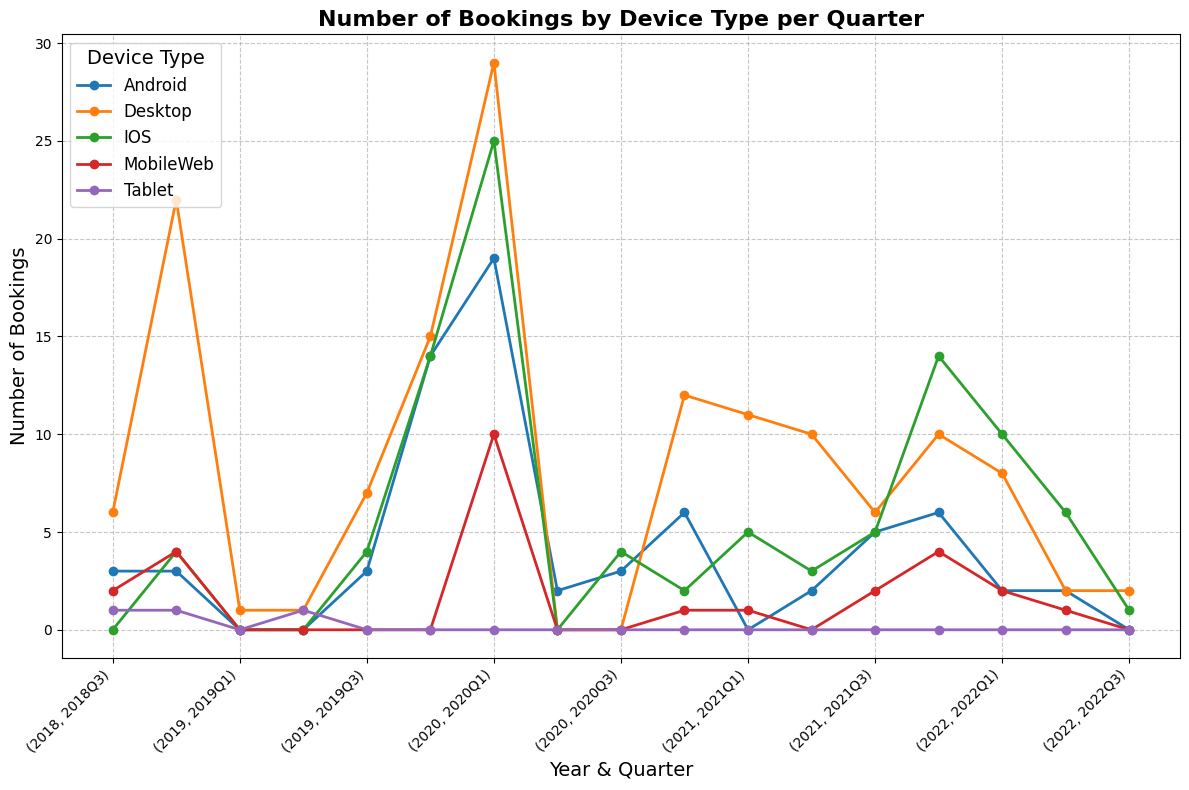

In [ ]:
# 9. Plot the trends at a quarterly frequency for the number of bookings by each of the
# device types, that is, plot a time series for each year and quarter showing the
# number of bookings performed by each device type.

# Step 1: Plot the data using a line plot with improved styling.
# The 'device_count_pivot' DataFrame should already be prepared and contain the bookings per device type
# per quarter, with 'year-quarter' as the index and device types as columns.
device_count_pivot.plot(kind='line', figsize=(12, 8), linewidth=2, marker='o')

# Step 2: Add a title to the plot with improved font size and style.
plt.title('Number of Bookings by Device Type per Quarter', fontsize=16, fontweight='bold')

# Step 3: Label the x-axis with 'Year & Quarter', and the y-axis with 'Number of Bookings'.
# The font sizes are set to 14 for better readability.
plt.xlabel('Year & Quarter', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)

# Step 4: Adjust the legend to clearly indicate the device type.
# 'title' adds a title to the legend, and 'loc' determines the position of the legend in the plot.
plt.legend(title='Device Type', fontsize=12, title_fontsize=14, loc='upper left')

# Step 5: Add grid lines to the plot for better readability of trends.
# The grid lines are styled with a dashed line and a transparency (alpha) of 0.7.
plt.grid(True, linestyle='--', alpha=0.7)

# Step 6: Rotate x-axis labels for better visibility, as they represent a time series.
# The 'ha' (horizontal alignment) is set to 'right' for better alignment of the labels.
plt.xticks(rotation=45, ha='right')

# Step 7: Adjust the layout to make sure everything fits without overlap,
# especially the x-axis labels and legend.
plt.tight_layout()

# Step 8: Display the plot.
plt.show()


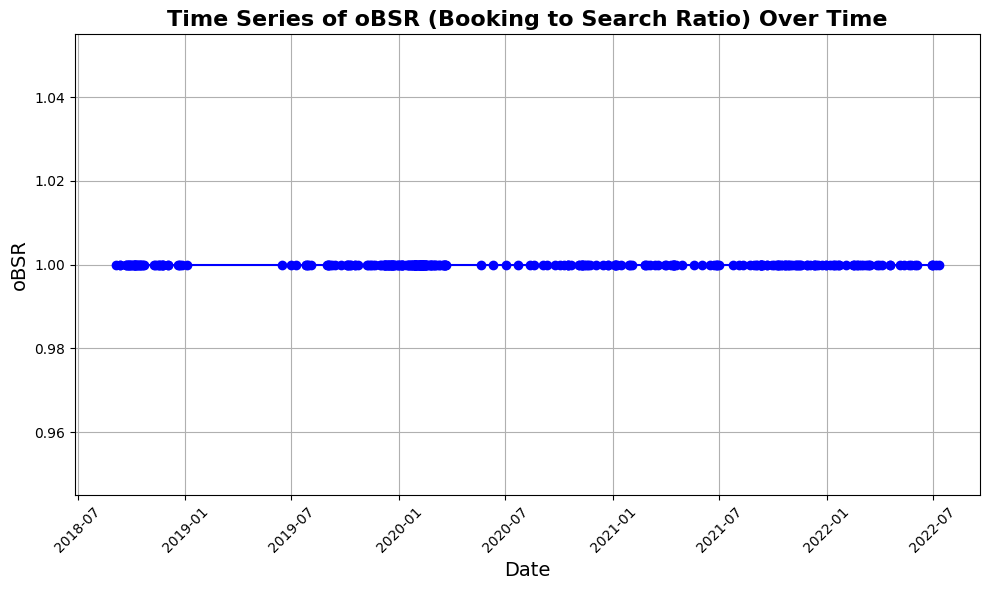

Average oBSR per Month: 1.0
Average oBSR per Day of the Week: 1.0


In [ ]:
# 10. Calculate and visualize the overall Booking to Search Ratio (oBSR)
# Given assumptions: 'bookings' DataFrame contains 'booking_time' and possibly 'search_time' columns.

# Step 1: Ensure booking_time is in datetime format
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# If 'search_time' is available (uncomment this if relevant)
# bookings['search_time'] = pd.to_datetime(bookings['search_time'])

# Step 2: Calculate oBSR for each month of the year
# Assuming each booking in the 'booking_time' is a result of a search
bookings['month'] = bookings['booking_time'].dt.month  # Extract month from booking time
monthly_oBSR = bookings.groupby('month').agg(
    total_searches=('booking_time', 'size'),  # Count searches by booking time (assuming each row is a search)
    total_bookings=('booking_time', 'size')   # Count bookings by booking time
)
# Calculate oBSR by dividing total bookings by total searches for each month
monthly_oBSR['oBSR'] = monthly_oBSR['total_bookings'] / monthly_oBSR['total_searches']
# Calculate the average oBSR for each month
monthly_oBSR_avg = monthly_oBSR['oBSR'].mean()

# Step 3: Calculate oBSR for each day of the week
bookings['day_of_week'] = bookings['booking_time'].dt.weekday  # Extract day of the week (0=Monday, 6=Sunday)
daily_oBSR = bookings.groupby('day_of_week').agg(
    total_searches=('booking_time', 'size'),  # Count searches by day of the week
    total_bookings=('booking_time', 'size')   # Count bookings by day of the week
)
# Calculate oBSR by dividing total bookings by total searches for each day of the week
daily_oBSR['oBSR'] = daily_oBSR['total_bookings'] / daily_oBSR['total_searches']
# Calculate the average oBSR for each day of the week
daily_oBSR_avg = daily_oBSR['oBSR'].mean()

# Step 4: Plotting the time series of oBSR for each booking date
# Group by booking time (date) to calculate daily oBSR
daily_oBSR_by_date = bookings.groupby('booking_time').agg(
    total_searches=('booking_time', 'size'),  # Count searches by booking time
    total_bookings=('booking_time', 'size')   # Count bookings by booking time
)
# Calculate oBSR for each date
daily_oBSR_by_date['oBSR'] = daily_oBSR_by_date['total_bookings'] / daily_oBSR_by_date['total_searches']

# Step 5: Plot the time series of oBSR
plt.figure(figsize=(10, 6))  # Set figure size for better readability
plt.plot(daily_oBSR_by_date.index, daily_oBSR_by_date['oBSR'], label='oBSR', color='b', marker='o')
plt.title('Time Series of oBSR (Booking to Search Ratio) Over Time', fontsize=16, fontweight='bold')  # Title with improved styling
plt.xlabel('Date', fontsize=14)  # X-axis label with larger font
plt.ylabel('oBSR', fontsize=14)  # Y-axis label with larger font
plt.grid(True)  # Enable grid for easier reading of values
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()

# Outputs: Print average oBSR values
print(f"Average oBSR per Month: {monthly_oBSR_avg}")
print(f"Average oBSR per Day of the Week: {daily_oBSR_avg}")
